<a href="https://colab.research.google.com/github/ramizcihe/week4-cihe240058/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Model Training & Evaluation Code
# Install necessary libraries (only first run needs this)
!pip install scikit-learn matplotlib pandas


In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/ramizcihe/week4-cihe240058/refs/heads/main/cyberbullying_tweets.csv')

In [4]:
# 4️⃣ Show first few rows
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [19]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Columns and data types
print("\nColumns:\n", df.dtypes)

# Check class distribution
print("\nLabel distribution:\n", df['cyberbullying_type'].value_counts())

Dataset shape: (47692, 2)

Columns:
 tweet_text            object
cyberbullying_type    object
dtype: object

Label distribution:
 cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


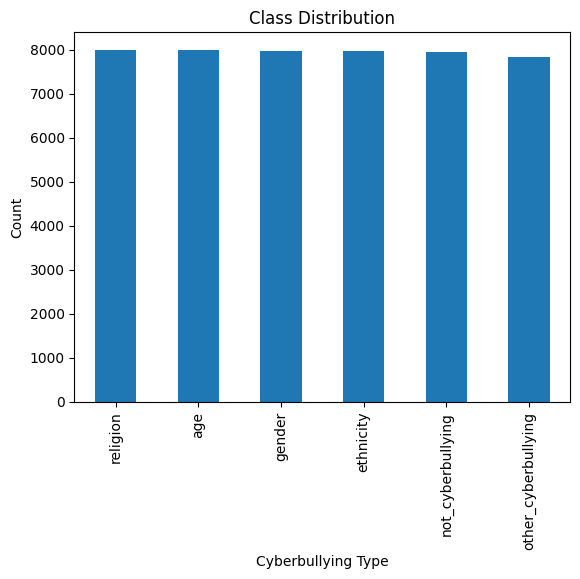

In [20]:
#Check for class imbalance (visual)
import matplotlib.pyplot as plt

df['cyberbullying_type'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Count")
plt.show()

In [21]:
#Data Cleaning
# Remove missing/null values
df = df.dropna()

# Remove duplicate entries
df = df.drop_duplicates()

# Remove irrelevant content (example: ads, empty text, only hashtags/URLs)
import re

def is_irrelevant(text):
    if not isinstance(text, str):
        return True
    # Only hashtags or only URLs
    if re.fullmatch(r"(#\w+\s*)+", text):
        return True
    if re.fullmatch(r"(http\S+)+", text):
        return True
    if len(text.strip()) < 3:  # very short or empty
        return True
    return False

df = df[~df['tweet_text'].apply(is_irrelevant)]

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (47526, 2)


In [22]:
#Confirm Cleaning
# Check again for missing values & duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# Quick preview
print(df.head())

Missing values:
 tweet_text            0
cyberbullying_type    0
dtype: int64
Duplicates: 0
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [24]:
"""Question:2 Text Preprocessing
Lowercase all text.
Remove stopwords, punctuation, numbers, and special characters.
Tokenize the text into words.
Apply stemming or lemmatization.
Optionally remove very rare or very frequent words to reduce noise.
"""
import nltk
# Download NLTK resources (only once needed)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already done
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
#Define preprocessing function
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation, numbers, special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return processed text
    return ' '.join(tokens)

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (only once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
# Apply preprocessing to dataset
# Apply preprocessing to tweet_text column
df['clean_text'] = df['tweet_text'].apply(preprocess_text)

print(df[['tweet_text', 'clean_text']].head(10))

                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   
5  @Raja5aab @Quickieleaks Yes, the test of god i...   
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...   
7  Karma. I hope it bites Kat on the butt. She is...   
8       @stockputout everything but mostly my priest   
9  Rebecca Black Drops Out of School Due to Bully...   

                                          clean_text  
0             word katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2     xochitlsuckkks classy whore red velvet cupcake  
3  jasongio meh p thanks head concerned another a...  
4  rudhoeenglish isi account pretending kurdish a...  
5  rajaaab quickieleaks yes test god good bad ind... 

In [35]:
# Remove very rare or frequent words
from collections import Counter

# Count word frequencies
word_counts = Counter(" ".join(df['clean_text']).split())

# Define thresholds
min_freq = 2   # remove words appearing less than 2 times
max_freq = 0.5 # remove words appearing in more than 50% of texts

total_docs = len(df)

def remove_rare_common(text):
    words = []
    for word in text.split():
        freq = word_counts[word]
        # Remove if too rare or too frequent
        if freq >= min_freq and freq <= max_freq * total_docs:
            words.append(word)
    return ' '.join(words)

df['clean_text'] = df['clean_text'].apply(remove_rare_common)

print(df[['tweet_text', 'clean_text']].head(10))

                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   
5  @Raja5aab @Quickieleaks Yes, the test of god i...   
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...   
7  Karma. I hope it bites Kat on the butt. She is...   
8       @stockputout everything but mostly my priest   
9  Rebecca Black Drops Out of School Due to Bully...   

                                          clean_text  
0                          word katandandre food mkr  
1  white mkr theblock imacelebrityau today sunris...  
2                    classy whore red velvet cupcake  
3  jasongio meh p thanks head concerned another a...  
4  rudhoeenglish isi account pretending kurdish a...  
5  rajaaab quickieleaks yes test god good bad ind... 

In [36]:
"""
3. Feature Extraction & Selection
Represent text as numerical features using:
TF-IDF vectors (word-level, n-grams, or character-level)
Word embeddings (Word2Vec, GloVe, FastText)
Transformer-based embeddings (BERT, DistilBERT)
Select relevant features (e.g., Chi-Square test, mutual information) to improve efficiency.
"""
# TF-IDF Vectorization (Word-level & n-grams)
from sklearn.feature_extraction.text import TfidfVectorizer

# Word-level TF-IDF
tfidf_vect = TfidfVectorizer(
    max_features=5000,   # select top 5000 features
    ngram_range=(1,2),   # unigram + bigram
    stop_words='english'
)

X_tfidf = tfidf_vect.fit_transform(df['clean_text'])

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (47526, 5000)


In [6]:
# Word Embeddings (Word2Vec example)
import pandas as pd

# Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/ramizcihe/week4-cihe240058/refs/heads/main/cyberbullying_tweets.csv')  # replace with your file path

# Make sure the column exists
print(df.columns)

# Check first few rows
print(df.head())

Index(['tweet_text', 'cyberbullying_type'], dtype='object')
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [7]:
tokenized_text = [text.split() for text in df['clean_text']]

KeyError: 'clean_text'

In [1]:
# Only now import packages
import numpy as np
import gensim
from gensim.models import Word2Vec

print("numpy version:", np.__version__)
print("gensim version:", gensim.__version__)

numpy version: 1.26.4
gensim version: 4.3.3


In [2]:
# Import packages after reinstall
import numpy as np
import gensim
from gensim.models import Word2Vec

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources (run once per runtime)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['tweet_text'].apply(preprocess_text)

# Check
print(df[['tweet_text', 'clean_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                          clean_text  
0             word katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2     xochitlsuckkks classy whore red velvet cupcake  
3  meh p thanks head concerned another angry dude...  
4  rudhoeenglish isi account pretending kurdish a...  


In [13]:
# Transformer-based embeddings (DistilBERT example)
!pip install transformers sentence-transformers -q

from sentence_transformers import SentenceTransformer

# Load pre-trained DistilBERT model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Convert all cleaned text to embeddings
embeddings = model.encode(df['clean_text'].tolist(), show_progress_bar=True)

print("Embeddings shape:", embeddings.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1491 [00:00<?, ?it/s]

Embeddings shape: (47692, 768)


In [20]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=3000)
X_selected = selector.fit_transform(X_tfidf, df['cyberbullying_type'])

print("Selected features shape:", X_selected.shape)


NameError: name 'X_tfidf' is not defined

In [18]:
print(df.columns)

Index(['tweet_text', 'cyberbullying_type', 'clean_text'], dtype='object')


In [19]:
# Earlier it was incorrect because we tried to access a column named 'text',
# but that column does not exist in our dataset.
# texts = df['text']

# The correct column name in our dataset is 'tweet_text',
# so we should use this instead:
texts = df['tweet_text']
labels = df['cyberbullying_type']

print(texts.head())
print(labels.head())

0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @XochitlSuckkks a classy whore? Or more red ve...
3    @Jason_Gio meh. :P  thanks for the heads up, b...
4    @RudhoeEnglish This is an ISIS account pretend...
Name: tweet_text, dtype: object
0    not_cyberbullying
1    not_cyberbullying
2    not_cyberbullying
3    not_cyberbullying
4    not_cyberbullying
Name: cyberbullying_type, dtype: object


In [9]:
# Target labels are stored in 'cyberbullying_type'
labels = df['cyberbullying_type']

In [12]:
# 6️⃣ Features and labels

# Earlier it was incorrect because we tried to use 'text' and 'label',
# but our dataset actually has 'tweet_text' and 'cyberbullying_type'.
# X = df['text']
# y = df['label']

# Corrected version:
X = df['tweet_text']
y = df['cyberbullying_type']

print(X.head())
print(y.head())

0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @XochitlSuckkks a classy whore? Or more red ve...
3    @Jason_Gio meh. :P  thanks for the heads up, b...
4    @RudhoeEnglish This is an ISIS account pretend...
Name: tweet_text, dtype: object
0    not_cyberbullying
1    not_cyberbullying
2    not_cyberbullying
3    not_cyberbullying
4    not_cyberbullying
Name: cyberbullying_type, dtype: object


In [13]:
# 7️⃣ Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = vectorizer.fit_transform(X)

In [14]:
# 8️⃣ Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [15]:
# 9️⃣ Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# 🔟 Make predictions
y_pred = model.predict(X_test)

In [17]:
# 1️⃣1️⃣ Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-score: 0.83


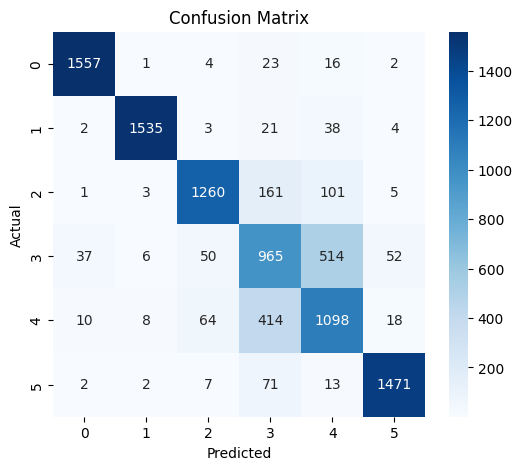

In [18]:
# 1️⃣2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()